In [105]:
print("hello Vijay")

hello Vijay


In [106]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

print("✅ All required libraries imported successfully!")


✅ All required libraries imported successfully!


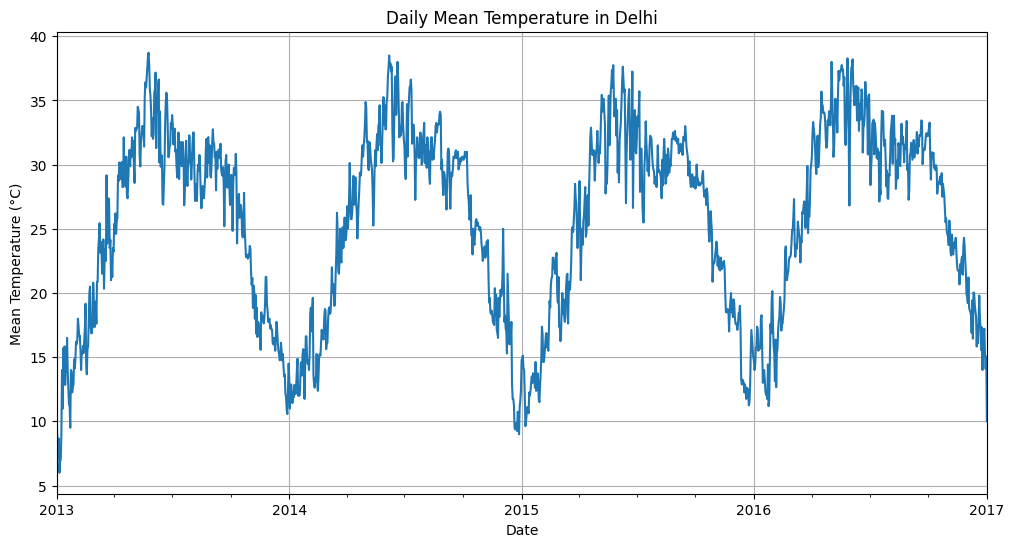

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



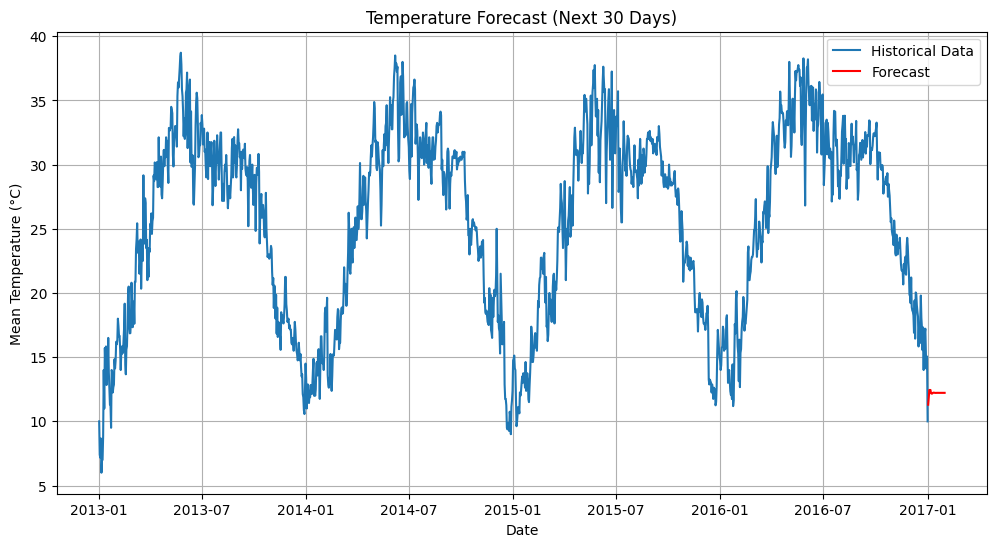

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load the dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Plot original data
df['meantemp'].plot(figsize=(12, 6), title='Daily Mean Temperature in Delhi')
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.grid()
plt.show()

# Fit ARIMA model
model = ARIMA(df['meantemp'], order=(5,1,0))  # p,d,q values can be tuned
model_fit = model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create date index for forecast
last_date = df.index[-1]
forecast_index = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['meantemp'], label="Historical Data")
plt.plot(forecast_index, forecast, label="Forecast", color='red')
plt.title("Temperature Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


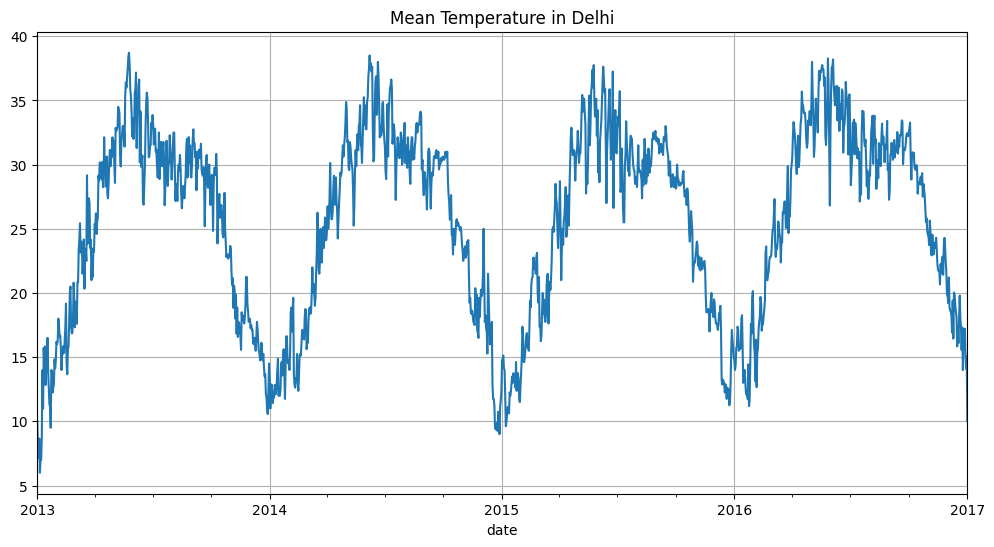

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



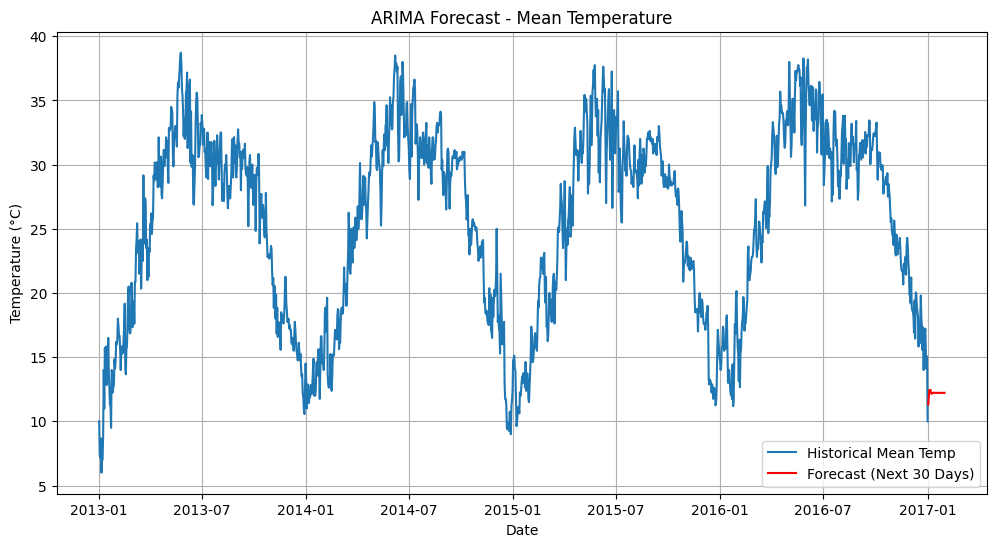

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot original data
df['meantemp'].plot(figsize=(12, 6), title='Mean Temperature in Delhi')
plt.grid()
plt.show()

# Fit ARIMA model manually — try (p=5, d=1, q=0) to start
model = ARIMA(df['meantemp'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 30 days
forecast_days = 30
forecast = model_fit.forecast(steps=forecast_days)

# Create future date range
last_date = df.index[-1]
forecast_index = [last_date + timedelta(days=i) for i in range(1, forecast_days+1)]

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['meantemp'], label="Historical Mean Temp")
plt.plot(forecast_index, forecast, color="red", label="Forecast (Next 30 Days)")
plt.title("ARIMA Forecast - Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_3932\1706166167.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



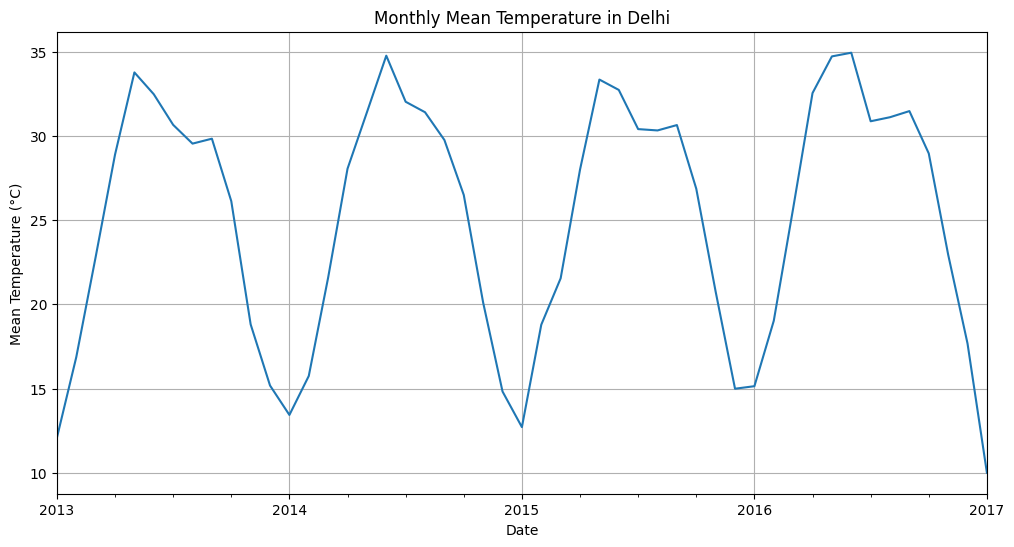

c:\Users\vijay\OneDrive\Desktop\ProJECT-wALMART\my_env1\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



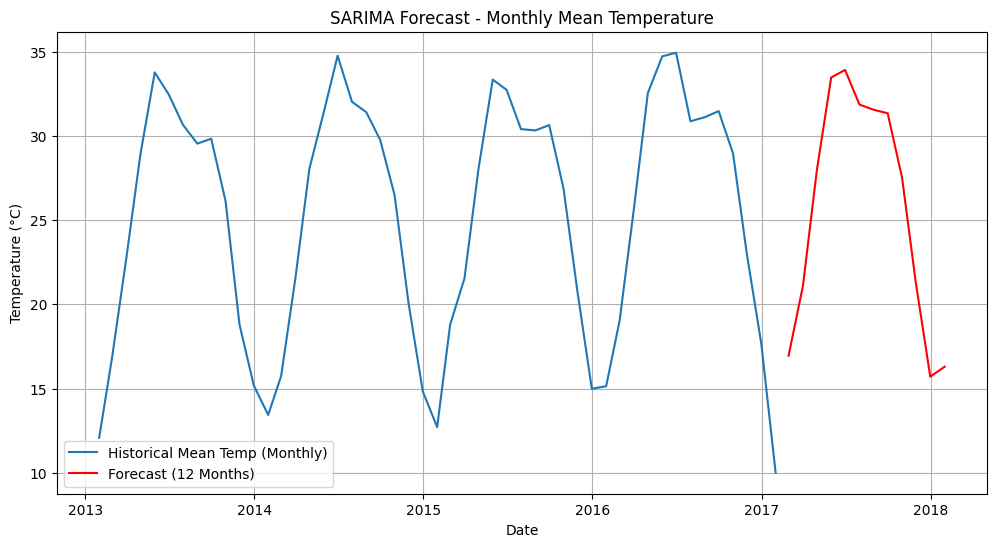

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Load the dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Optional: Resample to monthly average to highlight seasonality (can be skipped)
monthly_temp = df['meantemp'].resample('M').mean()

# Plot original data
monthly_temp.plot(figsize=(12, 6), title='Monthly Mean Temperature in Delhi')
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.grid()
plt.show()

# Fit SARIMA model (manual params: (p,d,q)(P,D,Q,s))
# s = 12 for monthly seasonality
model = SARIMAX(monthly_temp, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
last_date = monthly_temp.index[-1]
forecast_dates = [last_date + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_temp, label='Historical Mean Temp (Monthly)')
plt.plot(forecast_dates, forecast, label='Forecast (12 Months)', color='red')
plt.title('SARIMA Forecast - Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


14:08:31 - cmdstanpy - INFO - Chain [1] start processing
14:08:32 - cmdstanpy - INFO - Chain [1] done processing


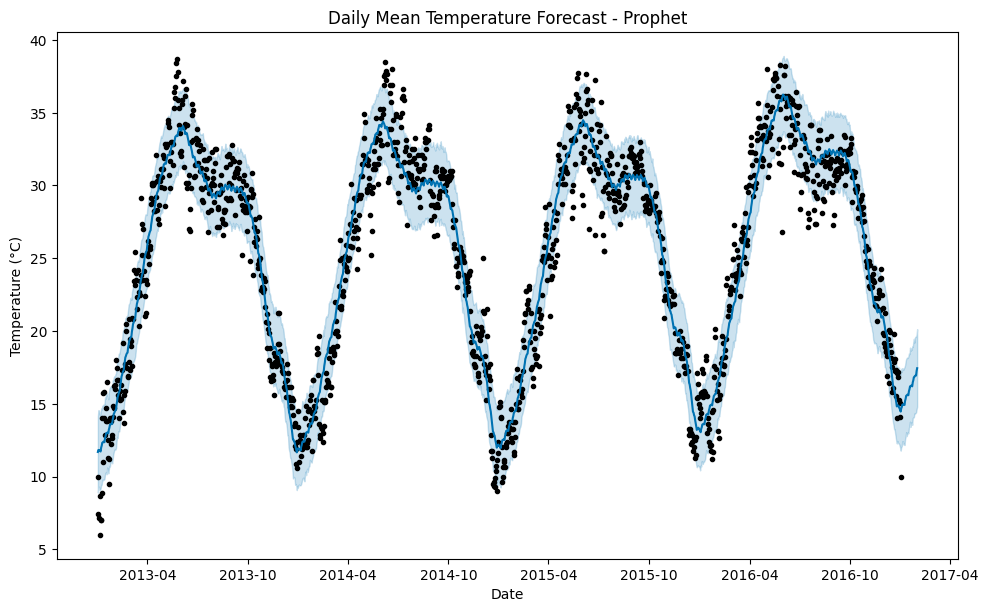

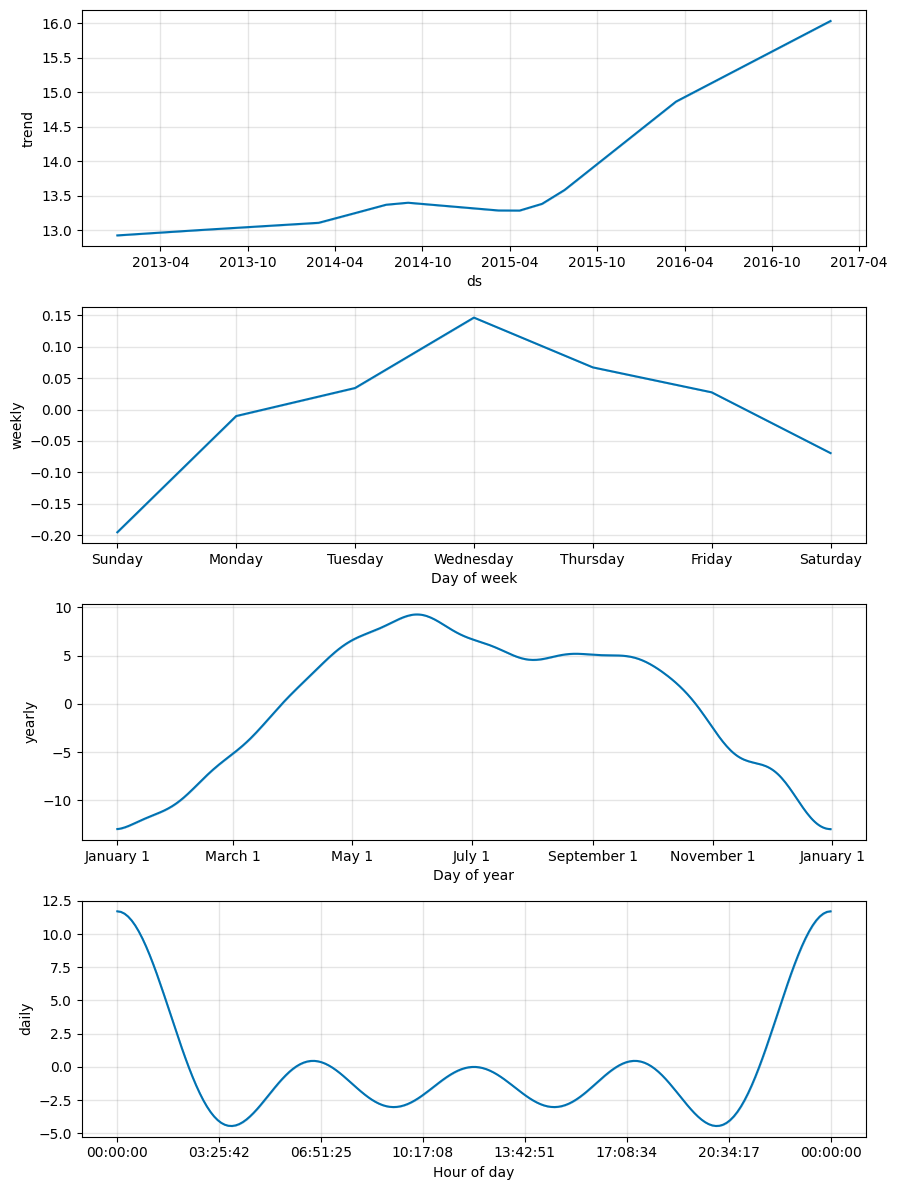

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# Prepare data for Prophet
df_prophet = df[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

# Initialize Prophet model
model = Prophet(daily_seasonality=True, yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)

# Make forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Daily Mean Temperature Forecast - Prophet")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

# Optional: Components plot (trend, yearly pattern, etc.)
fig2 = model.plot_components(forecast)
plt.show()


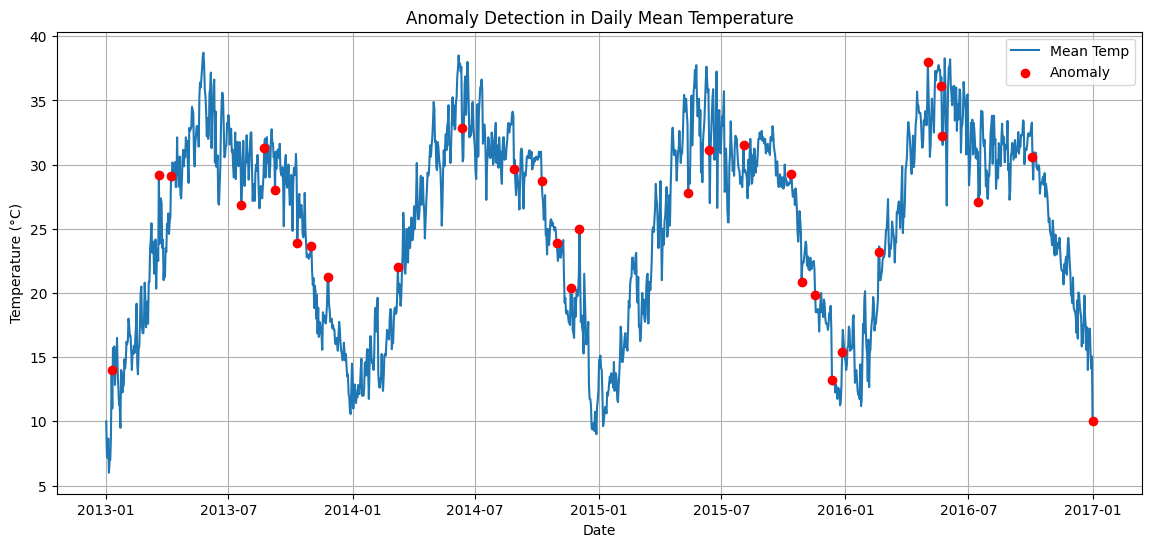

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculate rolling mean and standard deviation
window_size = 7  # 7-day window
df['rolling_mean'] = df['meantemp'].rolling(window=window_size).mean()
df['rolling_std'] = df['meantemp'].rolling(window=window_size).std()

# Define anomalies: points outside 2 standard deviations from mean
df['anomaly'] = (
    (df['meantemp'] > df['rolling_mean'] + 2 * df['rolling_std']) |
    (df['meantemp'] < df['rolling_mean'] - 2 * df['rolling_std'])
)

# Plot anomalies
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['meantemp'], label='Mean Temp')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['meantemp'], 
            color='red', label='Anomaly', zorder=5)
plt.title('Anomaly Detection in Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
